In [1]:
import sys
sys.path.append('/Users/Erin Ostrem/Documents/Venturelli_Lab/Pytools')
# import RLC_data_processing as dp
import os
import pandas as pd
import scipy.io
import datetime
import xml.etree.ElementTree as ET
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
# import plateTools as pt
import os
import pandas as pd
import scipy.io
import datetime
import xml.etree.ElementTree as ET
# from robotTools import *

In [2]:
def res_cons(y, t, w, C, m, num_res, num_species):
    
    dydt = np.zeros(num_res + num_species)
    # Constructing the equations for species equations
    for sp_in in range(0, num_species):
        for r_in in range(0, num_res):
            dydt[sp_in] = dydt[sp_in] + w[r_in, sp_in]*C[r_in, sp_in]*y[num_species + r_in]
            # i+r_in denotes the resource equation index
        dydt[sp_in] = y[sp_in]*(dydt[sp_in] - m[sp_in])
        
    # Constructing the equations for resource requations.
    for r_in in range (0, num_res):
        for sp_in in range(0, num_species):
            dydt[r_in + num_species] = dydt[r_in + num_species] + -1*C[r_in, sp_in]*y[r_in + num_species]*y[sp_in]
    return dydt

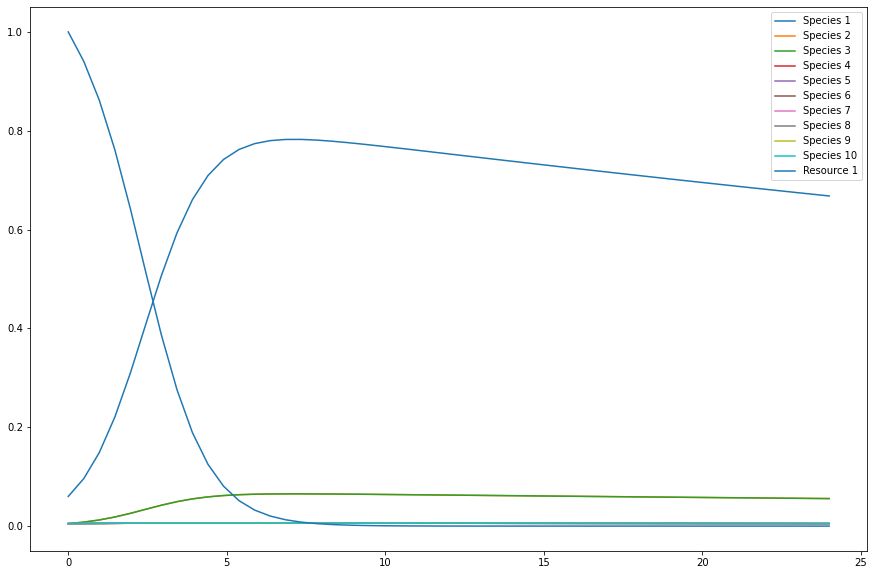

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#TEST SIMULATION
# Define parameters and initial values
num_res = 1 # Total number of resources
num_species = 10 # Total number of species
w = np.array([[1, 1, 1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]]) # Resource value matrix
C = np.array([[1, 1, 1, 1, 1,1, 1, 1, 1, 1]]) # Resource uptake matrix
m = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]) # Maintenance vector
init_vals_species = np.array([0.06, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,0.005, 0.005, 0.005]) # initial values for species
init_vals_res = np.array([1]) # initial values for resources
init_vals = np.hstack((init_vals_species, init_vals_res))
t = np.linspace(0, 24, 50) # Time points

sim_data = odeint(res_cons, init_vals, t, args = (w, C, m, num_res, num_species))

# Plotting the data
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1, 1, 1)
for sp in range(num_species):
    ax.plot(t, sim_data[:, sp], label = "Species " + str(sp + 1)) # Added 1 for natural numbers
for res in range(num_res):
    ax.plot(t, sim_data[:, num_species + res], label = "Resource " + str(res + 1)) # Added 1 for natural numbers
ax.legend()
plt.show()

In [4]:
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

In [5]:

mediandict={
    1:0.2,
    2:0.4,
    3:0.6,
    4:0.8,
    5:1.0,
    6:1.2,
    7:1.4,
    8:1.6,
    9:1.8,
    10:2.0
}


conlist=['COMM10<PJ','COMM10<BT','COMM10<BV','COMM10<DP','COMM10<BP','COMM10<EL','COMM10<BH','COMM10<AC','COMM10<DL','COMM10<equal']
comm10species=['AC','DP','BH','DL','EL','BT','BV','PJ','BP','CS']    
path='/Users/Erin Ostrem/Documents/Venturelli_Lab/FiberEcology_Manuscript/3.23.2022_FINALFINAL/MCRmodel/'
MasterDF=pd.read_csv(path+'InitialAbundanceComms.csv')
for z in list(MasterDF.index.values):
    for species in comm10species:
        MasterDF.at[z,species+' Absolute Abundance']=MasterDF.at[z,species+' Fraction']*MasterDF.at[z,'corrected OD']
        
subDF=MasterDF[(MasterDF['Passage']==0)&(MasterDF['Media']=='Inulin')]


num_res = 1 # Total number of resources
num_species = 10 # Total number of species
 # Resource uptake matrix
m = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]) # Maintenance vector
  
df=pd.DataFrame()
z=0
for rep in range(1,2):
    w1 = zerolistmaker(num_species) # Resource value matrix
    C1 = zerolistmaker(num_species)
    for numuts in range(1,11):
        for gparam in range(1,11):
            w1[numuts-1]=mediandict[gparam]
            C1[numuts-1]=mediandict[gparam]
            w=np.zeros((1,10))
            w[0]=w1
            C=np.zeros((1,10))
            C[0]=C1

            res1=1
            init_vals_res = np.array([res1]) # initial values for resources

            t = np.linspace(0, 24, 50)
            for treatment in conlist: 

                tempDF=subDF[subDF['Treatment']==treatment]
                abund=[]
                for species in comm10species:
                    abund.append(list(tempDF[species+' Absolute Abundance'])[0])
                init_vals_species = np.array(abund)
                init_vals = np.hstack((init_vals_species, init_vals_res))
                sim_data = odeint(res_cons, init_vals, t, args = (w, C, m, num_res, num_species))

                # Plotting the data
#                 fig = plt.figure(figsize = (15, 10))
#                 ax = fig.add_subplot(1, 1, 1)
#                 for sp in range(num_species):
#                     ax.plot(t, sim_data[:, sp], label = "Species " + str(sp + 1)) # Added 1 for natural numbers
#                 for res in range(num_res):
#                     ax.plot(t, sim_data[:, num_species + res], label = "Resource " + str(res + 1)) # Added 1 for natural numbers
#                 ax.legend()
#                 plt.title('Rep '+str(rep)+' Number of Utilizers= '+str(numuts))
#                 plt.show()
#                 plt.close()

                #Storing the data
                df.at[z,'Number of Utilizers']=numuts
                totalOD=[]
                for sp in range(num_species):
                    df.at[z,'Species '+str(sp)+' Abundance']=sim_data[49,sp]
                    totalOD.append(sim_data[49,sp])
                totalOD=sum(totalOD)
                for sp in range(num_species):
                    df.at[z,'Species '+str(sp)+' Fraction']=sim_data[49,sp]/totalOD
                df.at[z,'Species with high initial abundance']=treatment
                df.at[z,'Rep']=rep
                df.at[z,'Resource']=res1
                df.at[z,'Median Growth']=mediandict[gparam]

                z+=1


In [6]:
import scipy as sp
from scipy.spatial import distance
distDF=pd.DataFrame()
k=0
for rep in range(1,2):
    for numuts in range(1,11):
        for gparam in range(1,11):
            subdf=df[(df['Number of Utilizers']==numuts)&(df['Rep']==rep)&(df['Median Growth']==mediandict[gparam])]

            blahDF=subdf.dropna()
            newdf=blahDF.reset_index(drop=True)
            newDF=newdf.drop(columns=['Number of Utilizers','Species with high initial abundance','Rep','Resource','Median Growth'])

            for sp in range(num_species):
                newDF=newDF.drop(columns=['Species '+str(sp)+' Fraction'])

            indexlen=len(newDF.index.values)-1
        #         try:
            for z in list(newDF.index.values):
                for i in list(newDF.index.values):
                    if i<indexlen:
                        if i<z:
                            continue
                        elif i==z:
                            continue
                        else:
                            x=np.array(newDF.loc[z])
                            y=np.array(newDF.loc[i])
                            dist=distance.euclidean(x,y)
                            distDF.at[k,'Distance Measurent']='Absolute'
                            distDF.at[k,'Euclidean Distance']=dist
                            distDF.at[k,'Number of Utilizers2']='m'+str(numuts)
                            distDF.at[k,'Number of Utilizers']=numuts
                            distDF.at[k,'Rep']=rep
                            distDF.at[k,'Resource']=res
                            distDF.at[k,'Median Growth']=mediandict[gparam]
                            k+=1 
                    else:
                        break
                    z+=1
for rep in range(1,2):
    for numuts in range(1,11):
        for gparam in range(1,11):
                        
            subdf=df[(df['Number of Utilizers']==numuts)&(df['Rep']==rep)&(df['Median Growth']==mediandict[gparam])]

            blahDF=subdf.dropna()
            newdf=blahDF.reset_index(drop=True)
            newDF=newdf.drop(columns=['Number of Utilizers','Species with high initial abundance','Rep','Resource','Median Growth'])

            for sp in range(num_species):
                newDF=newDF.drop(columns=['Species '+str(sp)+' Abundance'])

            indexlen=len(newDF.index.values)-1
        #         try:
            for z in list(newDF.index.values):
                for i in list(newDF.index.values):
                    if i<indexlen:
                        if i<z:
                            continue
                        elif i==z:
                            continue
                        else:
                            x=np.array(newDF.loc[z])
                            y=np.array(newDF.loc[i])
                            dist=distance.euclidean(x,y)
                            distDF.at[k,'Distance Measurent']='Relative'
                            distDF.at[k,'Euclidean Distance']=dist
                            distDF.at[k,'Number of Utilizers2']='m'+str(numuts)
                            distDF.at[k,'Number of Utilizers']=numuts
                            distDF.at[k,'Rep']=rep
                            distDF.at[k,'Resource']=res
                            distDF.at[k,'Median Growth']=mediandict[gparam]
                            k+=1 
                    else:
                        break
                    z+=1

In [7]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

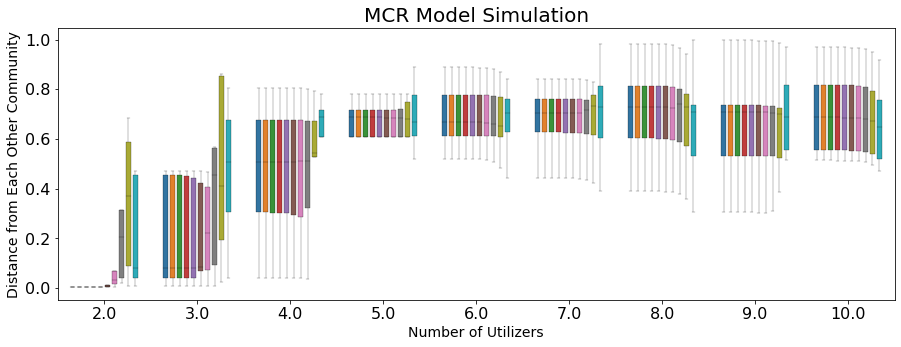

In [8]:
boxprops = {'edgecolor': 'k', 'linewidth': 0.25}#, 'facecolor': 'w'}
lineprops = {'color': 'k', 'linewidth': 0.25}
pal = {}
for uts in range(1,11):
    pal[uts]='black'
kwargs = {'palette': pal, 'hue_order': [1,2,3,4,5,6,7,8,9,10]}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 
                       'capprops': lineprops,
                       'width': 0.75})#,
                      #**kwargs)


stripplot_kwargs = dict({'linewidth': 0.1, 'size': 7, 'alpha': 0.5})
fig=plt.figure(figsize=(15,5))
subDF=distDF[(distDF['Distance Measurent']=='Relative')&(distDF['Number of Utilizers']!=1)]
b=sns.boxplot(x='Number of Utilizers', y='Euclidean Distance',data=subDF,hue='Median Growth',showfliers = False,**boxplot_kwargs)
#q=sns.stripplot(x='Number of Utilizers', y='Euclidean Distance', data=subDF,jitter=True, split=True, hue='Median Growth',**stripplot_kwargs)
b.axes.set_title('MCR Model Simulation',fontsize=20)

b.set_xlabel ('Number of Utilizers', fontsize=14)
b.set_ylabel ('Distance from Each Other Community', rotation='vertical',fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
b.get_legend().remove()

adjust_box_widths(fig, 0.65)



In [9]:
mediandict={
    1:0.2,
    2:0.4,
    3:0.6,
    4:0.8,
    5:1.0,
    6:1.2,
    7:1.4,
    8:1.6,
    9:1.8,
    10:2.0
}
hmDF=pd.DataFrame()
z=0
for numuts in range(2,11):
    for gparam in range(1,11):
        subdf=distDF[(distDF['Number of Utilizers']==numuts)&(distDF['Median Growth']==mediandict[gparam])&(distDF['Distance Measurent']=='Relative')]
        dist=subdf['Euclidean Distance'].median()
        hmDF.at[numuts/10,mediandict[gparam]]=dist
        z+=1

Text(0.5, 1.0, 'Mean')

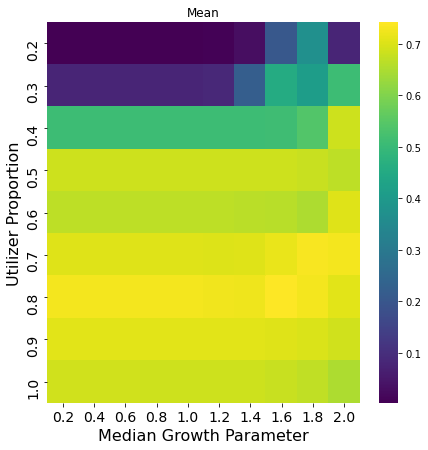

In [10]:
fig = plt.figure(figsize = (7, 7))
sns.heatmap(data=hmDF,cmap='viridis')
plt.xticks(fontsize=14)
plt.yticks(rotation=90,fontsize=14)
plt.ylabel('Utilizer Proportion',fontsize=16)
plt.xlabel('Median Growth Parameter',fontsize=16)
plt.title('Mean')

# plt.savefig('/Users/Erin Ostrem/Documents/Venturelli_Lab/10.10.2019_consumer_resource_modeling/IncreaseGR_relative.pdf',bbox_inches = 'tight')